# Fourier Transforms in Python

A fundamental skill for anyone working on signal/image related data is the ability to analyze the frequencies (and strength of thsoe frequencies making up a signal). There are a few assumptions that we have to consider before taking a Fourier Transform.

1. The underlying signal is periodic.
2. The integral overal the entire input space (from $-\infty$ to $\infty$) is finite.

If you need a primer to remind you about Fourier Transforms, the [Wikipedia](https://en.wikipedia.org/wiki/Fourier_transform) and [Math World](https://mathworld.wolfram.com/FourierTransform.html) articles are a good place to start. The Fourier Transform and Inverse Fourier Transform are defined as

\begin{align}
    H(\omega) &=
    \mathcal{F}\left[h(t)\right] &=
    \int_{-\infty}^{\infty} h(t) e^{-i \omega t} dt \\
    h(t) &=
    \mathcal{F}^{-1}\left[H(\omega)\right] &=
    \frac{1}{2\pi} \int_{-\infty}^{\infty} H(\omega) e^{i \omega t} dt \\
\end{align}

respectively.

Now, when it comes to numerical programming and data analysis, we do not have a *continuous* signal to analyze (for which the equations above are derived). Instead, we have a *disccrete* signal for which we collect data at regular intervals. Therefore, we need likewise need a *discrete* Fourier Transform (DFT) which is defined as

\begin{align}
    F_n &=
    \sum_{k=0}^{N-1} f_k e^{-2 \pi i n k / N} \\
    f_k &=
    \frac{1}{N} \sum_{n=0}^{N-1} F_n e^{2 \pi i n k / N} \\
\end{align}

where $f_k$ and $F_n$ are the signals in the two different domains, respectively (such as time and frequency domains).

The final piece of information that we will need is the definition of the power spectrum which is what we will use to measure the strength of each given frequency. For the discreet transforms, the power spectrum is defined as 

\begin{equation}
    S = F_n^* F_n.
\end{equation}

Perhaps this will be more convenient to understand with an example. Let's dive right in.

## Imports

In [1]:
# Python Imports

# 3rd Party Imports
import numpy as np
import pandas as pd
from scipy.signal import periodogram
from matplotlib import pyplot as plt

## Fourier Transform Example

### Signal Creation

Let's begin by creating a signal to analyze. I'll define the underlying signal as 

\begin{equation}
    x(t) = 5 \sin\left( 2 \pi f_1 t \right) + 7 \sin\left( 2 \pi f_2 t \right)
\end{equation}

where $f_1=2$ Hz and $f_2=5$ Hz. Again, since this is a *discrete* domain, we will also have to define the time step size which we will choose $\Delta t = 0.01$ s and we'll plot the underlying signal below.

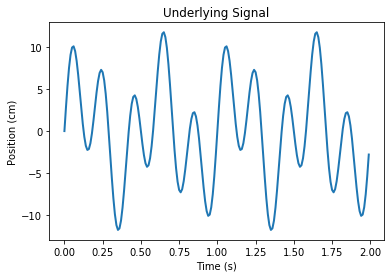

In [2]:
# Define the Variables
f1 = 2
f2 = 5
dt = 0.01
t = np.arange(0, 2, dt)
x = 5 * np.sin(2*np.pi*f1*t) + 7 * np.sin(2*np.pi*f2*t)

# Plot the Signal
_ = plt.plot(t, x, linewidth=2)
_ = plt.xlabel('Time (s)')
_ = plt.ylabel('Position (cm)')
_ = plt.title('Underlying Signal')

Now, to make this a little more realistic, let's add in some random Gaussian noise to this signal.

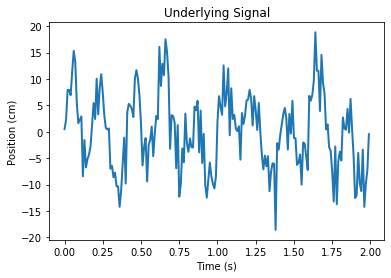

In [3]:
# Get the Random Number Generator
rng = np.random.default_rng(0)

# Add the Random Numbers to the Signal
x += 4*rng.standard_normal(x.shape)

# Plot the Noisy Signal
_ = plt.plot(t, x, linewidth=2)
_ = plt.xlabel('Time (s)')
_ = plt.ylabel('Position (cm)')
_ = plt.title('Underlying Signal')

### Signal Analysis

At this point we are ready to start analyzing the signal. For this, we will use the Numpy Fast Fourier Transform (FFT) library.

In [4]:
# Get the Fourier Transform
xT = np.fft.rfft(x)

Numpy provides several helper functions to parse through this data. We will use `rfftfreq` to get the frequencies of the transformed signal `xT`.

In [5]:
# Get the measured frequencies
f = np.fft.rfftfreq(x.size, dt)

Now, if you attempted to plot this signal that has been transformed, you would receive a Numpy warning. This would arise due to the complex nature of the data. Due to the definition of the Fourier transform, the outputs are going to be, in general, complex. Therefore, we need a way to represent the overall magnitude of the transform. To do that, we will compute the square root of the power spectrum.

Now, the [rfft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) and [rfftfreq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfftfreq.html#numpy.fft.rfftfreq) have a few nuances that we have to consider.

1. The Fourier Transform is defined over all space (positive and negative frequencies), but each of these functions only returns values in the positive frequencies (i.e., half of the possible values). Therefore, we will have to multiply all of the non-zero frequencies by 2.
2. The DFT defined gets larger with the more data points we add. Therefore, we will have to divide the transformed signal by $N$ where is $N$ is the number of datapoints in $x$.


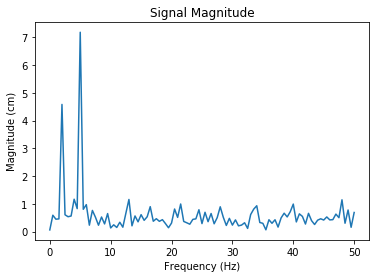

In [6]:
# Get the Transform Magnitudes
xT[1:] *= 2  # Multiply the non-zero frequencies by 2.
magT = np.abs(xT/x.size)  # Get the Magnitude of the scaled transform.

# Plot the 
_ = plt.plot(f, magT)
_ = plt.title('Signal Magnitude')
_ = plt.ylabel('Magnitude (cm)')
_ = plt.xlabel('Frequency (Hz)')

Scipy provides a convenient functon that calculates the RMS Power Spectrum. Therefore, we can use this function to wrap all the steps above into a single function call. However, since this is the *RMS* Power Spectrum, we will have to multiply this by two and take the square root to get the magnitudes we seek.

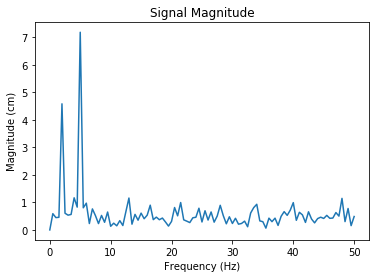

In [7]:
# Get the Power Spectrum
f, spec = periodogram(x, 1/dt, scaling='spectrum')

# Plot the Magnitudes
_ = plt.plot(f, np.sqrt(spec*2))
_ = plt.title('Signal Magnitude')
_ = plt.ylabel('Magnitude (cm)')
_ = plt.xlabel('Frequency (Hz)')

Note that the signal we originally created was of the form

\begin{equation}
    x(t) = 5 \sin\left( 2 \pi f_1 t \right) + 7 \sin\left( 2 \pi f_2 t \right)
\end{equation}

where $f_1=2$ Hz and $f_2=5$ Hz. From the figure you can see that we recovered the frequencies and amplitudes that were used to create this signal. On both of the figures above, there is a peak approximately equal to 5 cm at $f=2$ Hz, and there is a peak approximately equal to 7 cm at $f=5$ Hz.


## Assignment

Your assignment is to study the periodicity of the total number of sunspots. I have provided the data, input lines to read in the data and the lines needed to clean the data below. I downloaded this [data](http://www.sidc.be/silso/INFO/sndtotcsv.php) from the [Sunspot Index and Long-term Solar Observations Website](http://sidc.be/silso/home).

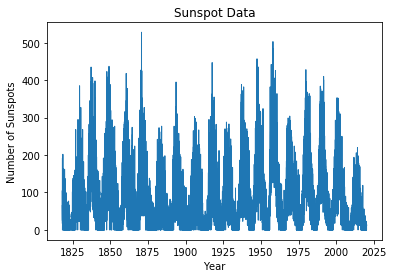

In [8]:
# Read in the Values as a Numpy array
ssDat = pd.read_csv(
    'SN_d_tot_V2.0.csv',
    sep=';',
    header=0,
    names=['Year', 'Month', 'Day', 'YearFraction', 'nSpots', 'std', 'nObs', 'Prov'],
    usecols=[3, 4],
    skiprows=6
).values

# Indicate -1 as missing data
ssN = ssDat[:, 1]
ssN[ssN == -1] = np.NaN
ssDat[:, 1] = ssN

# Interpolate Missing Data
msk = np.isfinite(ssDat[:, 1])
ssDat[:, 1] = np.interp(ssDat[:, 0], ssDat[msk, 0], ssDat[msk, 1])

# Get the Data into the form used above
dt = np.diff(ssDat[:, 0]).mean()
t  = ssDat[:, 0]
x  = ssDat[:, 1]

# Plot the Data
_ = plt.plot(t, x, linewidth=1)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Sunspots')
_ = plt.title('Sunspot Data')

### Plot the Magnitude of the Fourier Transform

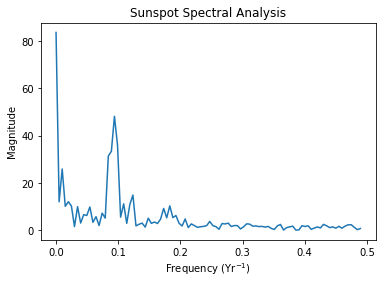

In [9]:
# Get the Fourier Transform
xT = np.fft.rfft(x)

# Get the measured frequencies
f = np.fft.rfftfreq(x.size, dt)

# Get the Transform Magnitudes
xT[1:] *= 2  # Multiply the non-zero frequencies by 2.
magT = np.abs(xT/x.size)  # Get the Magnitude of the scaled transform.

# Plot the 
_ = plt.plot(f[:100], magT[:100])
_ = plt.title('Sunspot Spectral Analysis')
_ = plt.ylabel('Magnitude')
_ = plt.xlabel('Frequency (Yr$^{-1}$)')

### Plot the Signal Magnitude using Scipy

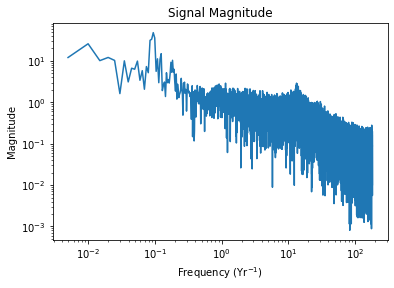

In [10]:
# Get the Power Spectrum
f, spec = periodogram(x, 1/dt, scaling='spectrum')

# Plot the Magnitudes
_ = plt.loglog(f[1:], np.sqrt(spec*2)[1:])
_ = plt.title('Signal Magnitude')
_ = plt.ylabel('Magnitude')
_ = plt.xlabel('Frequency (Yr$^{-1}$)')

In the cell below, insert the fundamental period (the inverse of the frequency with the highest magnitude) for the sunspot oscillations. If you are having a difficult time determining the correct frequency, you may want to plot a smaller window of data.

In [11]:
11

11